## Extraction

In [215]:
%matplotlib inline

# Write column names

In [216]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "\n" 
    
    # return string  
    return (str1.join(s))

# Libraries Import

In [217]:
import numpy as np
import pandas as pd
# import xlrd
# import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns
from pandas.api.types import CategoricalDtype

# For import export of model
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# print(plt.style.available)
# mpl.style.use(['seaborn']) # optional: for ggplot-like style


# Data Related

## Data Import

In [218]:
datastore = pd.read_csv('D:\\OneDrive - Institute of Business Administration\\Work\\Duft Und Du\\user_fragrance_review.csv', header=0)

In [219]:
df = pd.DataFrame(data=datastore)
df

,ufr_id,fba_country_name,fba_time_zone,longevity,suitability,sustainability,apply_time,wear_off_time,indoor_time_percentage,number_of_sprays,...,accord,ingredient,brand_id,brand,brand_discontinued,brand_tier,bo_location_country,bo_location_zone,fba_location_country,fba_location_zone
0,4,Italy,+02:00,270,NaN,6.0,2021-03-04 07:30:00,2021-03-04 12:00:00,55,16,...,Warm,Bergamot,6,Versace,NaN,High-End,Italy,+02:00,Italy,+02:00
1,4,Italy,+02:00,270,NaN,6.0,2021-03-04 07:30:00,2021-03-04 12:00:00,55,16,...,Warm,Bitter Orange,6,Versace,NaN,High-End,Italy,+02:00,Italy,+02:00
2,4,Italy,+02:00,270,NaN,6.0,2021-03-04 07:30:00,2021-03-04 12:00:00,55,16,...,Warm,Blood Orange,6,Versace,NaN,High-End,Italy,+02:00,Italy,+02:00
3,4,Italy,+02:00,270,NaN,6.0,2021-03-04 07:30:00,2021-03-04 12:00:00,55,16,...,Warm,Calamansi,6,Versace,NaN,High-End,Italy,+02:00,Italy,+02:00
4,4,Italy,+02:00,270,NaN,6.0,2021-03-04 07:30:00,2021-03-04 12:00:00,55,16,...,Warm,Chinotto,6,Versace,NaN,High-End,Italy,+02:00,Italy,+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,5,United Arab Emirates,+04:00,14,NaN,0.7,2021-03-04 17:21:00,2021-03-04 17:35:00,80,7,...,Citrus,Lime,7,Brut,NaN,Low-End,France,+02:00,United Arab Emirates,+04:00
1520,5,United Arab Emirates,+04:00,14,NaN,0.7,2021-03-04 17:21:00,2021-03-04 17:35:00,80,7,...,Citrus,Limetta,7,Brut,NaN,Low-End,France,+02:00,United Arab Emirates,+04:00
1521,5,United Arab Emirates,+04:00,14,NaN,0.7,2021-03-04 17:21:00,2021-03-04 17:35:00,80,7,...,Citrus,Litsea Cubeba,7,Brut,NaN,Low-End,France,+02:00,United Arab Emirates,+04:00
1522,5,United Arab Emirates,+04:00,14,NaN,0.7,2021-03-04 17:21:00,2021-03-04 17:35:00,80,7,...,Citrus,Mandarin Orange,7,Brut,NaN,Low-End,France,+02:00,United Arab Emirates,+04:00


In [220]:
df.head()

,ufr_id,fba_country_name,fba_time_zone,longevity,suitability,sustainability,apply_time,wear_off_time,indoor_time_percentage,number_of_sprays,...,accord,ingredient,brand_id,brand,brand_discontinued,brand_tier,bo_location_country,bo_location_zone,fba_location_country,fba_location_zone
0,4,Italy,+02:00,270,NaN,6.0,2021-03-04 07:30:00,2021-03-04 12:00:00,55,16,...,Warm,Bergamot,6,Versace,NaN,High-End,Italy,+02:00,Italy,+02:00
1,4,Italy,+02:00,270,NaN,6.0,2021-03-04 07:30:00,2021-03-04 12:00:00,55,16,...,Warm,Bitter Orange,6,Versace,NaN,High-End,Italy,+02:00,Italy,+02:00
2,4,Italy,+02:00,270,NaN,6.0,2021-03-04 07:30:00,2021-03-04 12:00:00,55,16,...,Warm,Blood Orange,6,Versace,NaN,High-End,Italy,+02:00,Italy,+02:00
3,4,Italy,+02:00,270,NaN,6.0,2021-03-04 07:30:00,2021-03-04 12:00:00,55,16,...,Warm,Calamansi,6,Versace,NaN,High-End,Italy,+02:00,Italy,+02:00
4,4,Italy,+02:00,270,NaN,6.0,2021-03-04 07:30:00,2021-03-04 12:00:00,55,16,...,Warm,Chinotto,6,Versace,NaN,High-End,Italy,+02:00,Italy,+02:00


In [221]:
df.columns

Index(['ufr_id', 'fba_country_name', 'fba_time_zone', 'longevity',
       'suitability', 'sustainability', 'apply_time', 'wear_off_time',
       'indoor_time_percentage', 'number_of_sprays', 'projection', 'sillage',
       'like', 'temp_avg', 'hum_avg', 'dew_point_avg', 'uv_index_avg',
       'temp_feels_like_avg', 'atm_pressure_avg', 'clouds_avg',
       'visibility_avg', 'wind_speed_avg', 'rain_avg', 'snow_avg',
       'weather_main', 'weather_description', 'users_id', 'fp_id',
       'user_check', 'gender', 'dob', 'sweat', 'height', 'weight',
       'profession', 'skin_type', 'climate', 'season', 'fp_country',
       'fp_time_zone', 'fragrance_id', 'fragrance', 'fragrance_gender',
       'fragrance_discontinued', 'fragrance_type', 'accord', 'ingredient',
       'brand_id', 'brand', 'brand_discontinued', 'brand_tier',
       'bo_location_country', 'bo_location_zone', 'fba_location_country',
       'fba_location_zone'],
      dtype='object')

## Cleaning

In [222]:
# df = df[df.columns.difference(['fba_country_name', 'fba_time_zone', 'suitability', 'sustainability', 'sillage', 'like', 'users_id', 'user_check', 'fba_location_country', 'fba_location_zone', 'apply_time', 'wear_off_time', 'indoor_time_percentage', 'projection'], sort=False)]

# df.drop(columns=['fba_country_name', 'fba_time_zone', 'suitability', 'sustainability', 'sillage', 'like', 'users_id', 'user_check', 'fba_location_country', 'fba_location_zone', 'apply_time', 'wear_off_time' , 'indoor_time_percentage', 'projection'], inplace=True)

df.drop(columns=['fba_country_name', 'fba_time_zone', 'suitability', 'sustainability', 'sillage', 'like', 'users_id', 'user_check', 'fba_location_country', 'fba_location_zone', 'indoor_time_percentage', 'projection', 'accord', 'ingredient', 'fp_time_zone', 'fragrance_discontinued', 'brand_discontinued', 'bo_location_zone', 'weather_description'], inplace=True)


# with open('longevity_template.pickle', 'rb') as f:
#     fragrance, profile, weather = pickle.load(f)

file = open('longevity_column_names_after_initial_drop.txt', 'w')

# dump information to that file
file.write(listToString(df.columns))

# close the file
file.close()

In [223]:
df.dtypes

ufr_id                   int64
longevity                int64
apply_time              object
wear_off_time           object
number_of_sprays         int64
temp_avg               float64
hum_avg                float64
dew_point_avg          float64
uv_index_avg           float64
temp_feels_like_avg    float64
atm_pressure_avg       float64
clouds_avg             float64
visibility_avg           int64
wind_speed_avg         float64
rain_avg               float64
snow_avg               float64
weather_main            object
fp_id                    int64
gender                  object
dob                     object
sweat                    int64
height                   int64
weight                   int64
profession              object
skin_type               object
climate                 object
season                  object
fp_country              object
fragrance_id             int64
fragrance               object
fragrance_gender        object
fragrance_type          object
brand_id

In [224]:
df.isnull().sum()

ufr_id                    0
longevity                 0
apply_time                0
wear_off_time             0
number_of_sprays          0
temp_avg                  0
hum_avg                   0
dew_point_avg             0
uv_index_avg              0
temp_feels_like_avg       0
atm_pressure_avg          0
clouds_avg                0
visibility_avg            0
wind_speed_avg            0
rain_avg                912
snow_avg               1524
weather_main              0
fp_id                     0
gender                    0
dob                       0
sweat                     0
height                    0
weight                    0
profession                0
skin_type                 0
climate                   0
season                    0
fp_country                0
fragrance_id              0
fragrance                 0
fragrance_gender          0
fragrance_type            0
brand_id                  0
brand                     0
brand_tier                0
bo_location_country 

In [225]:
# Missing Values
# df['suitability'].fillna(df['suitability'].median(), inplace=True)
# df['suitability'].fillna(int(df['suitability'].mean()), inplace=True)

# df['suitability'].fillna(int(0), inplace=True)

# df['projection'].fillna(int(0), inplace=True)
df['rain_avg'].fillna(int(0), inplace=True)
df['snow_avg'].fillna(int(0), inplace=True)

# df['user_check'].fillna(int(0), inplace=True)


df['sweat'].fillna(int(df['sweat'].mean()), inplace=True)


# df['fragrance_discontinued'].fillna(int(0), inplace=True)
# df['brand_discontinued'].fillna(int(0), inplace=True)


In [226]:
# df['skin_type']

In [227]:
# # create the dummies on the training data
# dummy_train = pd.get_dummies(df['skin_type'])
# dummy_train

In [228]:
# # create the dummies in the new (unseen data)
# test_df = pd.DataFrame(data=['Very Oily', 'low', 'Normal'], columns=['skin_type'])
# test_df['skin_type']

In [229]:
# dummy_new = pd.get_dummies(test_df['skin_type'])
# dummy_new

In [230]:
# # re-index the new data to the columns of the training data, filling the missing values with 0
# dummy_new.reindex(columns = dummy_train.columns, fill_value=0)
# dummy_new

In [231]:
# data['Temperature_encoded'] = data['Temperature'].map( {'low':0, 'medium':1, 'high':2})
# data[['Temperature', 'Temperature_encoded']]

## Data Types

In [232]:
df = df.convert_dtypes()

# Datetime
df['dob']               = df['dob'].astype('datetime64[ns]')
df['apply_time']        = df['apply_time'].astype('datetime64[ns]')
df['wear_off_time']     = df['wear_off_time'].astype('datetime64[ns]')

# Boolean
# df['fragrance_discontinued']    = df['fragrance_discontinued'].astype('bool')
# df['brand_discontinued']        = df['brand_discontinued'].astype('bool')

# Categorical Variables
# df["ufr_id"]                = df["ufr_id"].astype(CategoricalDtype(df.ufr_id.unique()))

# df["weather_main"]          = df["weather_main"].astype(CategoricalDtype(df.weather_main.unique()))
# # df["weather_description"]   = df["weather_description"].astype(CategoricalDtype(df.weather_description.unique()))
# df["fp_id"]                 = df["fp_id"].astype(CategoricalDtype(df.fp_id.unique()))
# df["gender"]                = df["gender"].astype(CategoricalDtype(df.gender.unique()))
# df["profession"]            = df["profession"].astype(CategoricalDtype(df.profession.unique()))
# df["skin_type"]             = df["skin_type"].astype(CategoricalDtype(df.skin_type.unique()))
# df["climate"]               = df["climate"].astype(CategoricalDtype(df.climate.unique()))
# df["season"]                = df["season"].astype(CategoricalDtype(df.season.unique()))
# df["fp_country"]            = df["fp_country"].astype(CategoricalDtype(df.fp_country.unique()))
# # df["fp_time_zone"]          = df["fp_time_zone"].astype(CategoricalDtype(df.fp_time_zone.unique()))
# df["fragrance_id"]          = df["fragrance_id"].astype(CategoricalDtype(df.fragrance_id.unique()))
# df["fragrance"]             = df["fragrance"].astype(CategoricalDtype(df.fragrance.unique()))
# df["fragrance_gender"]      = df["fragrance_gender"].astype(CategoricalDtype(df.fragrance_gender.unique()))
# df["fragrance_type"]        = df["fragrance_type"].astype(CategoricalDtype(df.fragrance_type.unique()))
# # df["accord"]                = df["accord"].astype(CategoricalDtype(df.accord.unique()))
# # df["ingredient"]            = df["ingredient"].astype(CategoricalDtype(df.ingredient.unique()))
# df["brand_id"]              = df["brand_id"].astype(CategoricalDtype(df.brand_id.unique()))
# df["brand"]                 = df["brand"].astype(CategoricalDtype(df.brand.unique()))
# df["brand_tier"]            = df["brand_tier"].astype(CategoricalDtype(df.brand_tier.unique()))
# df["bo_location_country"]   = df["bo_location_country"].astype(CategoricalDtype(df.bo_location_country.unique()))
# # df["bo_location_zone"]      = df["bo_location_zone"].astype(CategoricalDtype(df.bo_location_zone.unique()))


# df.dtypes

In [233]:
# Adding new 

In [234]:
# Calcualting Age
now = pd.to_datetime('now')
df['age'] = (now - df['dob']).dt.total_seconds() / (60*60*24*365.25)
df.drop(['dob'],axis=1, inplace=True)

In [235]:
# Sorting out Dates

# Apply Time
df['apply_time_year']          = df['apply_time'].dt.year
df['apply_time_month']         = df['apply_time'].dt.month
df['apply_time_day']           = df['apply_time'].dt.day
df['apply_time_hour']          = df['apply_time'].dt.hour
df['apply_time_minute']        = df['apply_time'].dt.minute
df['apply_time_weekday_name']  = df['apply_time'].dt.day_name()

# Wear Off Time
df['wear_off_time_year']          = df['wear_off_time'].dt.year
df['wear_off_time_month']         = df['wear_off_time'].dt.month
df['wear_off_time_day']           = df['wear_off_time'].dt.day
df['wear_off_time_hour']          = df['wear_off_time'].dt.hour
df['wear_off_time_minute']        = df['wear_off_time'].dt.minute
df['wear_off_time_weekday_name']  = df['wear_off_time'].dt.day_name()

# Type Cast
df['age']               = df['age'].astype('float')

# Drop Apply Time & Wear Off Time
df.drop(['apply_time'],axis=1, inplace=True)
df.drop(['wear_off_time'],axis=1, inplace=True)

In [236]:
# df.describe()

In [237]:
# use pd.concat to join the new columns with your original dataframe
df = pd.concat([df,pd.get_dummies(df['ufr_id'], prefix='ufr_id')],axis=1)

df = pd.concat([df,pd.get_dummies(df['apply_time_weekday_name'], prefix='apply_time_weekday_name')],axis=1)
df = pd.concat([df,pd.get_dummies(df['wear_off_time_weekday_name'], prefix='wear_off_time_weekday_name')],axis=1)

df = pd.concat([df,pd.get_dummies(df['weather_main'], prefix='weather_main')],axis=1)
# df = pd.concat([df,pd.get_dummies(df['weather_description'], prefix='weather_description')],axis=1)

df = pd.concat([df,pd.get_dummies(df['fp_id'], prefix='fp_id')],axis=1)
df = pd.concat([df,pd.get_dummies(df['gender'], prefix='gender')],axis=1)
df = pd.concat([df,pd.get_dummies(df['profession'], prefix='profession')],axis=1)
df = pd.concat([df,pd.get_dummies(df['skin_type'], prefix='skin_type')],axis=1)
df = pd.concat([df,pd.get_dummies(df['climate'], prefix='climate')],axis=1)
df = pd.concat([df,pd.get_dummies(df['season'], prefix='season')],axis=1)

df = pd.concat([df,pd.get_dummies(df['fp_country'], prefix='fp_country')],axis=1)
# df = pd.concat([df,pd.get_dummies(df['fp_time_zone'], prefix='fp_time_zone')],axis=1)

df = pd.concat([df,pd.get_dummies(df['fragrance_id'], prefix='fragrance_id')],axis=1)
df = pd.concat([df,pd.get_dummies(df['fragrance'], prefix='fragrance')],axis=1)
df = pd.concat([df,pd.get_dummies(df['fragrance_gender'], prefix='fragrance_gender')],axis=1)
df = pd.concat([df,pd.get_dummies(df['fragrance_type'], prefix='fragrance_type')],axis=1)

# df = pd.concat([df,pd.get_dummies(df['accord'], prefix='accord')],axis=1)
# df = pd.concat([df,pd.get_dummies(df['ingredient'], prefix='ingredient')],axis=1)

df = pd.concat([df,pd.get_dummies(df['brand_id'], prefix='brand_id')],axis=1)
df = pd.concat([df,pd.get_dummies(df['brand'], prefix='brand')],axis=1)
df = pd.concat([df,pd.get_dummies(df['brand_tier'], prefix='brand_tier')],axis=1)
df = pd.concat([df,pd.get_dummies(df['bo_location_country'], prefix='bo_location_country')],axis=1)
# df = pd.concat([df,pd.get_dummies(df['bo_location_zone'], prefix='bo_location_zone')],axis=1)

In [238]:
# now drop the original 'country' column (you don't need it anymore)
df.drop(['ufr_id'],axis=1, inplace=True)

df.drop(['apply_time_weekday_name'],axis=1, inplace=True)
df.drop(['wear_off_time_weekday_name'],axis=1, inplace=True)

# Not available in prediction  prediciton
df.drop(['wear_off_time_year'],axis=1, inplace=True)
df.drop(['wear_off_time_month'],axis=1, inplace=True)
df.drop(['wear_off_time_day'],axis=1, inplace=True)
df.drop(['wear_off_time_hour'],axis=1, inplace=True)
df.drop(['wear_off_time_minute'],axis=1, inplace=True)


df.drop(['weather_main'],axis=1, inplace=True)
# df.drop(['weather_description'],axis=1, inplace=True)

df.drop(['fp_id'],axis=1, inplace=True)
df.drop(['gender'],axis=1, inplace=True)
df.drop(['profession'],axis=1, inplace=True)
df.drop(['skin_type'],axis=1, inplace=True)
df.drop(['climate'],axis=1, inplace=True)
df.drop(['season'],axis=1, inplace=True)

df.drop(['fp_country'],axis=1, inplace=True)
# df.drop(['fp_time_zone'],axis=1, inplace=True)

df.drop(['fragrance_id'],axis=1, inplace=True)
df.drop(['fragrance'],axis=1, inplace=True)
df.drop(['fragrance_gender'],axis=1, inplace=True)
df.drop(['fragrance_type'],axis=1, inplace=True)

# df.drop(['accord'],axis=1, inplace=True)
# df.drop(['ingredient'],axis=1, inplace=True)

df.drop(['brand_id'],axis=1, inplace=True)
df.drop(['brand'],axis=1, inplace=True)
df.drop(['brand_tier'],axis=1, inplace=True)
df.drop(['bo_location_country'],axis=1, inplace=True)
# df.drop(['bo_location_zone'],axis=1, inplace=True)

# To Be Included Later
# df.drop(['projection'],axis=1, inplace=True)

file = open('longevity_column_names_after_cleaning_drop.txt', 'w')

# dump information to that file
file.write(listToString(df.columns))

# close the file
file.close()

In [130]:
print(df.shape)
print(df.duplicated(keep='first').sum())

(1524, 56)
1522


In [131]:
df.head()

,longevity,number_of_sprays,temp_avg,hum_avg,dew_point_avg,uv_index_avg,temp_feels_like_avg,atm_pressure_avg,clouds_avg,visibility_avg,...,fragrance_gender_Male,fragrance_type_Eau de Toilette,brand_id_6,brand_id_7,brand_Versace,brand_Brut,brand_tier_High-End,brand_tier_Low-End,bo_location_country_Italy,bo_location_country_France
0,270,16,74.99,22.5,32.45,6.4,69.75,1014.62,42.25,60000,...,0,1,1,0,1,0,1,0,1,0
1,270,16,74.99,22.5,32.45,6.4,69.75,1014.62,42.25,60000,...,0,1,1,0,1,0,1,0,1,0
2,270,16,74.99,22.5,32.45,6.4,69.75,1014.62,42.25,60000,...,0,1,1,0,1,0,1,0,1,0
3,270,16,74.99,22.5,32.45,6.4,69.75,1014.62,42.25,60000,...,0,1,1,0,1,0,1,0,1,0
4,270,16,74.99,22.5,32.45,6.4,69.75,1014.62,42.25,60000,...,0,1,1,0,1,0,1,0,1,0


In [132]:
# Use this and fix this
# aggregation_functions = {'longevity': 'first', 'amount': 'sum', 'name': 'first'}
# df_new = df.groupby(df['ufr_id']).aggregate(aggregation_functions)
# df_new.head()

In [133]:
df.drop_duplicates(subset=None, keep="first", inplace=True)
df.shape

(2, 56)

In [134]:
# Columns with any null values
df.columns[df.isna().any()].tolist()

[]

In [135]:
df.describe()

,longevity,number_of_sprays,temp_avg,hum_avg,dew_point_avg,uv_index_avg,temp_feels_like_avg,atm_pressure_avg,clouds_avg,visibility_avg,...,fragrance_gender_Male,fragrance_type_Eau de Toilette,brand_id_6,brand_id_7,brand_Versace,brand_Brut,brand_tier_High-End,brand_tier_Low-End,bo_location_country_Italy,bo_location_country_France
count,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,2.00000,2.000000,2.0,...,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,142.000000,11.500000,76.705000,22.12500,34.055000,6.395000,70.92000,1014.43500,51.935000,60000.0,...,0.500000,1.0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
std,181.019336,6.363961,2.425376,0.53033,2.269813,0.007071,1.65463,0.26163,13.696658,0.0,...,0.707107,0.0,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107
min,14.000000,7.000000,74.990000,21.75000,32.450000,6.390000,69.75000,1014.25000,42.250000,60000.0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.000000,9.250000,75.847500,21.93750,33.252500,6.392500,70.33500,1014.34250,47.092500,60000.0,...,0.250000,1.0,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000
50%,142.000000,11.500000,76.705000,22.12500,34.055000,6.395000,70.92000,1014.43500,51.935000,60000.0,...,0.500000,1.0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,206.000000,13.750000,77.562500,22.31250,34.857500,6.397500,71.50500,1014.52750,56.777500,60000.0,...,0.750000,1.0,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000
max,270.000000,16.000000,78.420000,22.50000,35.660000,6.400000,72.09000,1014.62000,61.620000,60000.0,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model

In [136]:
df.dtypes

longevity                                   Int64
number_of_sprays                            Int64
temp_avg                                  Float64
hum_avg                                   Float64
dew_point_avg                             Float64
uv_index_avg                              Float64
temp_feels_like_avg                       Float64
atm_pressure_avg                          Float64
clouds_avg                                Float64
visibility_avg                              Int64
wind_speed_avg                            Float64
rain_avg                                  Float64
snow_avg                                    Int64
sweat                                       Int64
height                                      Int64
weight                                      Int64
age                                       float64
apply_time_year                             int64
apply_time_month                            int64
apply_time_day                              int64


## Train

In [137]:
# define the target variable (dependent variable) as y
y = df.longevity
y=y.astype('float64')

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1, 56) (1,)
(1, 56) (1,)


In [138]:
# Create Decision Tree classifer object
clf = DecisionTreeRegressor(random_state = 0, criterion='mse')

In [139]:
# Train Decision Tree Classifer
model = clf.fit(X_train, y_train)

## Test

In [140]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [141]:
X_test.dtypes

longevity                                   Int64
number_of_sprays                            Int64
temp_avg                                  Float64
hum_avg                                   Float64
dew_point_avg                             Float64
uv_index_avg                              Float64
temp_feels_like_avg                       Float64
atm_pressure_avg                          Float64
clouds_avg                                Float64
visibility_avg                              Int64
wind_speed_avg                            Float64
rain_avg                                  Float64
snow_avg                                    Int64
sweat                                       Int64
height                                      Int64
weight                                      Int64
age                                       float64
apply_time_year                             int64
apply_time_month                            int64
apply_time_day                              int64


In [142]:
# Test
# y_pred = lm.predict(X_test)
# from sklearn.model_selection import cross_val_predict
# predicted = cross_val_predict(lm, df_long, y, cv=10)

# fig, ax = plt.subplots()
# ax.scatter(y, predicted)
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()

## Evaluate

Text(0, 0.5, 'Predictions')

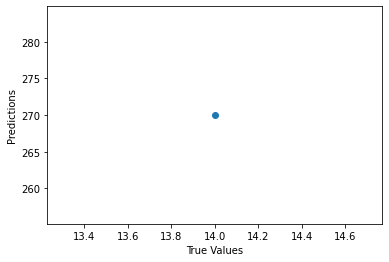

In [143]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [144]:
# The coefficients
# print('Coefficients: \n', model.coef_)
# The mean squared error
# print('Mean squared error: %.2f'
#       % metrics.mean_squared_error(y_test, y_pred))
# # The coefficient of determination: 1 is perfect prediction
# print('Coefficient of determination: %.2f'
#       % metrics.r2_score(y_test, y_pred))

# Plot outputs
# plt.scatter(X_test, y_test,  color='black')
# plt.plot(X_test, y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

In [145]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 256.0
Mean Squared Error: 65536.0
Root Mean Squared Error: 256.0


## Save the model in pickle

In [146]:
#Pickling the list
file = open('longevity_model.pickle', 'wb')

# dump information to that file
list_pickle = pickle.dump(model, file)

# close the file
file.close()

In [150]:
with open('longevity_model.pickle', 'rb') as f:
    loaded_pickle = pickle.load(f)
    
loaded_pickle

DecisionTreeRegressor(random_state=0)

# END